# JC3503 Assignment - Apartments

---

Student Name: 

Student Email: 

Student ID: 

---

Additional information about the dataset: https://archive.ics.uci.edu/dataset/555/apartment+for+rent+classified

In [22]:
# Add any pre-requisites or libraries here
import pandas as pd
import seaborn as sns
import sklearn as sk

# Import the data
df = pd.read_csv("apartments.csv", low_memory=False)

Start with a glance at the data

In [23]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668640009,housing/rent/apartment,One BR 507 & 509 Esplanade,"This unit is located at 507 & 509 Esplanade, R...",NaN,1.0,1.0,USD,No,Thumbnail,...,"$2,195",Monthly,542,507 509 Esplanade,Redondo Beach,CA,33.8520,-118.3759,RentLingo,1577360355
1,5668639818,housing/rent/apartment,Three BR 146 Lochview Drive,"This unit is located at 146 Lochview Drive, Ne...",NaN,1.5,3.0,USD,No,Thumbnail,...,"$1,250",Monthly,1500,146 Lochview Dr,Newport News,VA,37.0867,-76.4941,RentLingo,1577360340
2,5668639686,housing/rent/apartment,Three BR 3101 Morningside Drive,This unit is located at 3101 Morningside Drive...,NaN,2.0,3.0,USD,No,Thumbnail,...,"$1,395",Monthly,1650,3101 Morningside Dr,Raleigh,NC,35.8230,-78.6438,RentLingo,1577360332
3,5668639659,housing/rent/apartment,Two BR 209 Aegean Way,"This unit is located at 209 Aegean Way, Vacavi...",NaN,1.0,2.0,USD,No,Thumbnail,...,"$1,600",Monthly,820,209 Aegean Way,Vacaville,CA,38.3622,-121.9712,RentLingo,1577360330
4,5668639374,housing/rent/apartment,One BR 4805 Marquette NE,"This unit is located at 4805 Marquette NE, Alb...",NaN,1.0,1.0,USD,No,Thumbnail,...,$975,Monthly,624,4805 Marquette NE,Albuquerque,NM,35.1038,-106.6110,RentLingo,1577360308


# 1. Data pre-processing
The two parameters of currency and price type may cause inconsistency in the data units, so we will convert the data units into consistency first

## 1.1 Check currency

In [24]:
df['currency'].value_counts()

USD    99492
Name: currency, dtype: int64

We are pleased to find that the currencies are in USD and do not need to be converted

## 1.2 Check price_type

In [25]:
df['price_type'].value_counts()

Monthly           99488
Weekly                3
Monthly|Weekly        1
Name: price_type, dtype: int64

We convert all prices into monthly

In [26]:
df[df['price_type'] == 'Weekly']

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
6729,5659276240,housing/rent/apartment,Studio Cottage 214,"New Bern Studio includes : 1 beds, 1 microwave...","AC,Basketball,Cable or Satellite,Gym,Internet ...",1.0,1.0,USD,No,Thumbnail,...,"$1,560 Weekly",Weekly,200,NaN,New Bern,NC,35.0847,-77.0609,ListedBuy,1576618076
49908,5518370229,housing/rent/apartment,"Beautiful, Private and Convenient in Nw Woods",WebID 1087137 Rental Registration #: 18-843 Th...,"AC,Fireplace,Patio/Deck,Pool,TV",4.0,4.0,USD,No,No,...,"$8,500 Weekly",Weekly,3600,7 Passing Road,East Hampton,NY,41.0020,-72.1796,Nest Seekers,1569318970
83395,5161839760,housing/rent/apartment,2 BR 2.5 BA APARTMENT $850 PER WEEK (Upper Eas...,"An extremely great opportunity to lease a 2,32...",Elevator,2.5,2.0,USD,No,Thumbnail,...,$850 Weekly,Weekly,2326,NaN,New York,NY,40.7247,-73.9545,SpreadMyAd,1547858154


In [27]:
df.loc[df['price_type'] == 'Weekly', 'price'] *= 4
df.loc[df['price_type'] == 'Weekly', 'price_type'] = 'Monthly'
df['price_type'].value_counts()

Monthly           99491
Monthly|Weekly        1
Name: price_type, dtype: int64

## 1.3 Data slice
For this dataset, we want to focus on the relationship between some conditions and prices, which is not very important for some data like the title. So we slice the primary data.

In [28]:
df2 = df[['bathrooms', 'bedrooms', 'price', 'square_feet']]
df2

,bathrooms,bedrooms,price,square_feet
0,1.0,1.0,2195.0,542
1,1.5,3.0,1250.0,1500
2,2.0,3.0,1395.0,1650
3,1.0,2.0,1600.0,820
4,1.0,1.0,975.0,624
...,...,...,...,...
99487,1.0,1.0,780.0,605
99488,2.0,2.0,813.0,921
99489,1.0,1.0,1325.0,650
99490,1.0,1.0,931.0,701


# 2. Data cleaning
We want to clean the data, fill in the empty data, and find the wrong data.
Let's start by looking at the distribution of key data

In [29]:
df2.describe()

,bathrooms,bedrooms,price,square_feet
count,99429.000000,99368.000000,99491.000000,99492.000000
mean,1.445323,1.728212,1527.386256,956.430688
std,0.547021,0.749200,909.958608,417.571522
min,1.000000,0.000000,100.000000,101.000000
25%,1.000000,1.000000,1013.000000,729.000000
50%,1.000000,2.000000,1350.000000,900.000000
75%,2.000000,2.000000,1795.000000,1115.000000
max,9.000000,9.000000,52500.000000,50000.000000


Fill all empty spaces with the median

In [30]:
df2 = df2.apply(lambda col: col.fillna(col.median()) if col.dtype != 'object' else col)
df2

,bathrooms,bedrooms,price,square_feet
0,1.0,1.0,2195.0,542
1,1.5,3.0,1250.0,1500
2,2.0,3.0,1395.0,1650
3,1.0,2.0,1600.0,820
4,1.0,1.0,975.0,624
...,...,...,...,...
99487,1.0,1.0,780.0,605
99488,2.0,2.0,813.0,921
99489,1.0,1.0,1325.0,650
99490,1.0,1.0,931.0,701


Look for extreme or erroneous data

In [31]:
df2.nlargest(100, 'price')

,bathrooms,bedrooms,price,square_feet
6863,1.0,0.0,52500.0,1418
40932,8.0,6.0,40000.0,7145
17131,4.0,4.0,35000.0,2269
28037,5.0,7.0,35000.0,5586
40715,7.5,6.0,35000.0,6366
...,...,...,...,...
477,7.0,7.0,9000.0,4355
23757,4.0,5.0,9000.0,4321
39356,3.5,3.0,9000.0,3369
40728,2.0,3.0,9000.0,1986


In [32]:
df2.nlargest(100, 'square_feet')

,bathrooms,bedrooms,price,square_feet
51672,1.0,1.0,2640.0,50000
7153,1.0,1.0,4790.0,40000
50964,1.0,0.0,565.0,12000
3907,8.5,6.0,11000.0,11318
35034,1.0,6.0,29500.0,11000
...,...,...,...,...
94403,3.0,5.0,5200.0,3942
57925,4.0,5.0,3350.0,3914
41756,2.0,3.0,2641.0,3906
23170,3.5,4.0,5495.0,3900


# 3. Data analysis

In [33]:
sns.set_theme()
%matplotlib inline

<AxesSubplot:xlabel='square_feet', ylabel='price'>

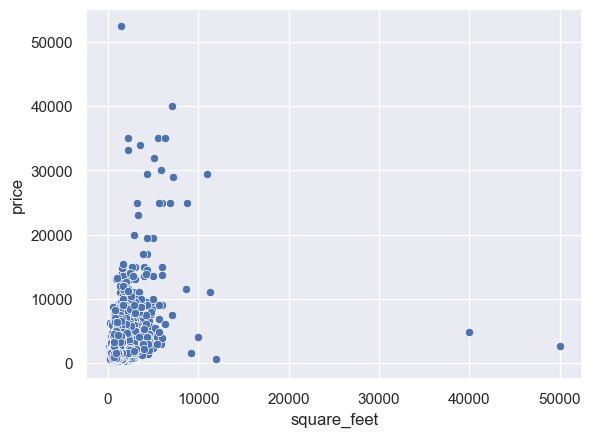

In [34]:
sns.scatterplot(x='square_feet', y='price', data=df2)